In [1]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello World')

In [4]:
x = tf.constant(100)

In [5]:
x

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [80]:
sess = tf.Session()

In [8]:
sess.run(hello)

b'Hello World'

In [9]:
#Operations

In [10]:
x = tf.constant(2)

In [11]:
y = tf.constant(3)

In [12]:
with tf.Session() as sess:
    print('Operations with Constants')
    print(sess.run(x+y))

Operations with Constants
5


In [13]:
x = tf.placeholder(tf.int32)

In [14]:
y = tf.placeholder(tf.int32)

In [15]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [16]:
add = tf.add(x,y)

In [20]:
mul = tf.multiply(x,y)

In [25]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print('addition', sess.run(add, feed_dict = {x:20, y:30}))

Operations with Placeholders
addition 50


In [26]:
import numpy as np

In [27]:
a = np.array([[5.,5.]])

In [28]:
b = np.array([[2.],[2.]])

In [29]:
a.shape

(1, 2)

In [30]:
b.shape

(2, 1)

In [31]:
mat1 = tf.constant(a)

In [32]:
mat2 = tf.constant(b)

In [33]:
matrix_multi = tf.matmul(mat1, mat2)

In [35]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[ 20.]]


In [36]:
from tensorflow.examples.tutorials.mnist import input_data

In [37]:
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [38]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [40]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [43]:
mnist.train.images[2].shape

(784,)

In [44]:
sample = mnist.train.images[2].reshape(28,28)

In [45]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

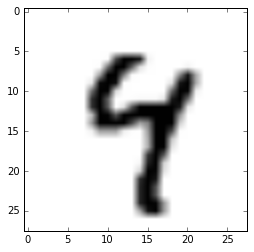

In [47]:
plt.imshow(sample, cmap='Greys')

In [49]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [50]:
n_classes = 10
n_samples = mnist.train.num_examples

In [51]:
n_input = 784

In [52]:
n_hidden_1 = 256
n_hidden_2 = 256

In [58]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    #First Hidden Layer with RELU Activation
    
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [59]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [60]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [61]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [62]:
pred = multilayer_perceptron(x, weights, biases)

In [78]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [72]:
t = mnist.train.next_batch(1)

In [73]:
Xsamp,ysamp = t

In [74]:
ysamp

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [82]:
init = tf.global_variables_initializer()
sess.run(init)

In [100]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer, cost], feed_dict = {x:batch_x, y:batch_y})
        avg_cost += c/total_batch
    
    print("Epoch: {} cost {:.4f}".format(epoch+1, avg_cost))

print("model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost 0.1950
Epoch: 2 cost 0.1797
Epoch: 3 cost 0.2105
Epoch: 4 cost 0.1661
Epoch: 5 cost 0.1532
Epoch: 6 cost 0.1507
Epoch: 7 cost 0.1464
Epoch: 8 cost 0.1297
Epoch: 9 cost 0.1531
Epoch: 10 cost 0.1653
Epoch: 11 cost 0.1288
Epoch: 12 cost 0.1848
Epoch: 13 cost 0.1115
Epoch: 14 cost 0.1425
Epoch: 15 cost 0.1483
model has completed 15 Epochs of training


In [84]:
## Model evaluations

In [94]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))

In [95]:
print (correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [96]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [97]:
print(correct_predictions[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [98]:
accuracy = tf.reduce_mean(correct_predictions)

In [101]:
accuracy.eval({x: mnist.test.images, y: mnist.test.labels}, session=sess)

0.96310002

In [102]:
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()

In [104]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [105]:
X = iris['data']
y = iris['target']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [122]:
import tensorflow.contrib.learn as skflow

In [123]:
feature_columns = skflow.infer_real_valued_columns_from_input(X_train)

In [170]:
classifier = skflow.DNNClassifier(hidden_units = [10, 20, 40, 40, 20, 10], n_classes = 3, feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_save_checkpoints_steps': None, '_master': '', '_tf_random_seed': None, '_model_dir': '/tmp/tmpz741kapf', '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc9e0627da0>, '_task_id': 0, '_evaluation_master': '', '_save_summary_steps': 100, '_task_type': None, '_session_config': None, '_num_worker_replicas': 0, '_keep_checkpoint_max': 5, '_is_chief': True}


In [171]:
classifier.fit(X_train, y_train, steps = 10000, batch_size = 32)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpz741kapf/model.ckpt.
INFO:tensorflow:loss = 1.10359, step = 1
INFO:tensorflow:global_step/sec: 699.129
INFO:tensorflow:loss = 0.391986, step = 101 (0.144 sec)
INFO:tensorflow:global_step/sec: 921.39
INFO:tensorflow:loss = 0.338897, step = 201 (0.109 sec)
INFO:tensorflow:global_step/sec: 892.352
INFO:tensorflow:loss = 0.208217, step = 301 (0.112 sec)
INFO:tensorflow:global_step/sec: 946.458
INFO:tensorflow:loss = 0.131847, step = 401 (0.106 sec)
INFO:tensorflow:global_step/sec: 811.497
INFO:tensorflow:loss = 0.196716, step = 501 (0.123 sec)
INFO:tensorflow:global_step/sec: 850.201
INFO:tensorflow:loss = 0.0395968, step = 601 (0.118 sec)
INFO:tensorflow:global_step/sec: 899.264
INFO:tensorflow:loss = 0.00635193, step = 701 (0.112 sec)
INFO:tensorflow:global_step/sec: 886.82
INFO:tensorflow:loss = 0.0105815, step = 801 (0.112 sec)
INFO:tensorflow:global_step/sec: 801.03
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 1002.26
INFO:tensorflow:loss = 0.000370198, step = 8101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1002.2
INFO:tensorflow:loss = 5.82258e-06, step = 8201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1043.35
INFO:tensorflow:loss = 4.77383e-05, step = 8301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1018.55
INFO:tensorflow:loss = 0.000326889, step = 8401 (0.098 sec)
INFO:tensorflow:global_step/sec: 969.837
INFO:tensorflow:loss = 4.70833e-05, step = 8501 (0.105 sec)
INFO:tensorflow:global_step/sec: 989.381
INFO:tensorflow:loss = 0.000193141, step = 8601 (0.099 sec)
INFO:tensorflow:global_step/sec: 908.694
INFO:tensorflow:loss = 0.000193866, step = 8701 (0.110 sec)
INFO:tensorflow:global_step/sec: 871.364
INFO:tensorflow:loss = 0.000113155, step = 8801 (0.115 sec)
INFO:tensorflow:global_step/sec: 1011.21
INFO:tensorflow:loss = 0.000150106, step = 8901 (0.099 sec)
INFO:tensorflow:global_step/sec: 1010.62
INFO:tensorflow:loss = 1.33616e-05, step = 9001 (0.

DNNClassifier(params={'gradient_clip_norm': None, 'optimizer': None, 'hidden_units': [10, 20, 40, 40, 20, 10], 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fc9e15ece80>, 'embedding_lr_multipliers': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'dropout': None, 'input_layer_min_slice_size': None, 'activation_fn': <function relu at 0x7fca649f2e18>})

In [172]:
iris_predictions = list(classifier.predict(X_test, as_iterable = True))

INFO:tensorflow:Restoring parameters from /tmp/tmpz741kapf/model.ckpt-10000


In [173]:
#len(iris_predictions)
len(y_test)

45

In [174]:
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
print(classification_report(y_test, iris_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.94      0.97        17
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45

